In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel
import multiprocessing as mp
from joblib import Parallel, delayed

In [2]:
df = pd.read_csv('train.csv')

In [3]:
for column in df.columns:
    if df[column].dtype != 'object':
        df[column].fillna(df[column].median(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)

C:\Users\yaswa\AppData\Local\Temp\ipykernel_18044\3306208265.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
C:\Users\yaswa\AppData\Local\Temp\ipykernel_18044\3306208265.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [4]:
# Feature engineering
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['Loan_Amount_Term_log'] = np.log(df['Loan_Amount_Term'])

Number of people who take loans as grouped by gender: 
Gender
1    502
0    112
Name: count, dtype: int64


C:\Users\yaswa\AppData\Local\Temp\ipykernel_18044\3537665882.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=df, palette="Set1")


<Axes: xlabel='Gender', ylabel='count'>

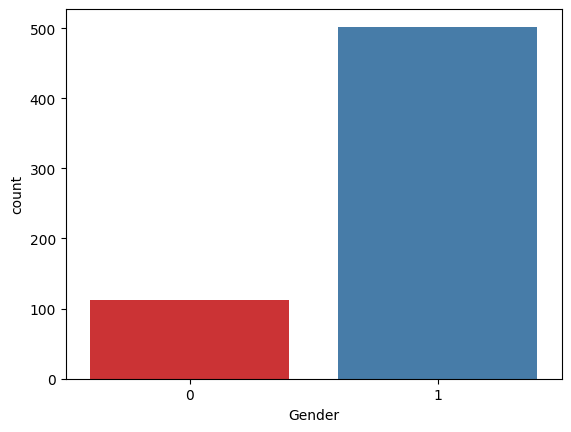

In [18]:
print("Number of people who take loans as grouped by gender: ")
print(df['Gender'].value_counts())
sns.countplot(x="Gender", data=df, palette="Set1")

Number of people who take loans as grouped by marriage status: 
Married
1    401
0    213
Name: count, dtype: int64


C:\Users\yaswa\AppData\Local\Temp\ipykernel_18044\3712347322.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Married", data=df, palette="Set1")


<Axes: xlabel='Married', ylabel='count'>

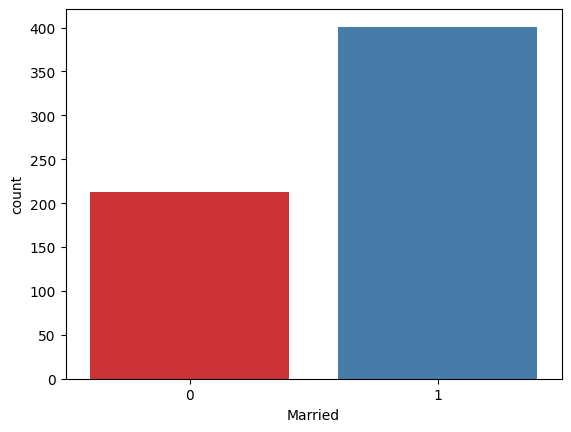

In [19]:
print("Number of people who take loans as grouped by marriage status: ")
print(df['Married'].value_counts())
sns.countplot(x="Married", data=df, palette="Set1")

Number of people who take loans as grouped by Dependents : 
Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64


C:\Users\yaswa\AppData\Local\Temp\ipykernel_18044\1523362287.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Dependents", data=df, palette="Set1")


<Axes: xlabel='Dependents', ylabel='count'>

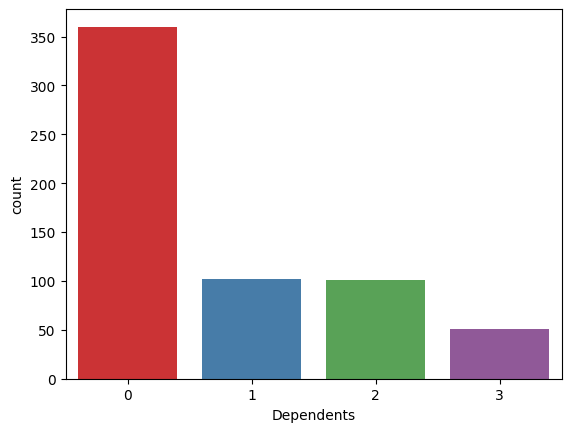

In [20]:
print("Number of people who take loans as grouped by Dependents : ")
print(df['Dependents'].value_counts())
sns.countplot(x="Dependents", data=df, palette="Set1")

Number of people who take loans as grouped by Self_Employed: 
Self_Employed
0    532
1     82
Name: count, dtype: int64


C:\Users\yaswa\AppData\Local\Temp\ipykernel_18044\2278872889.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Self_Employed", data=df, palette="Set1")


<Axes: xlabel='Self_Employed', ylabel='count'>

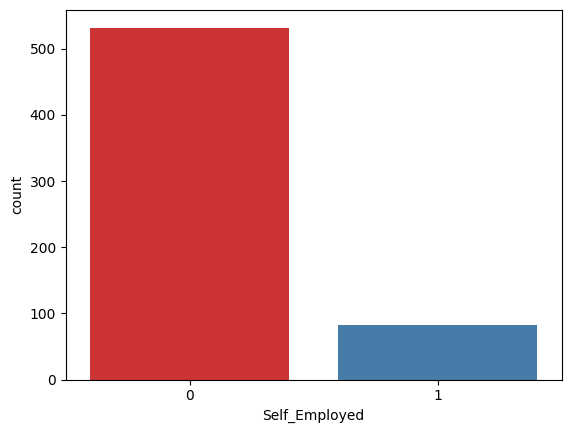

In [21]:
print("Number of people who take loans as grouped by Self_Employed: ")
print(df['Self_Employed'].value_counts())
sns.countplot(x="Self_Employed", data=df, palette="Set1")

Number of people who take loans as grouped by LoanAmount: 
LoanAmount
128.0    33
120.0    20
110.0    17
100.0    15
160.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64


C:\Users\yaswa\AppData\Local\Temp\ipykernel_18044\2060585357.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="LoanAmount", data=df, palette="Set1")


<Axes: xlabel='LoanAmount', ylabel='count'>

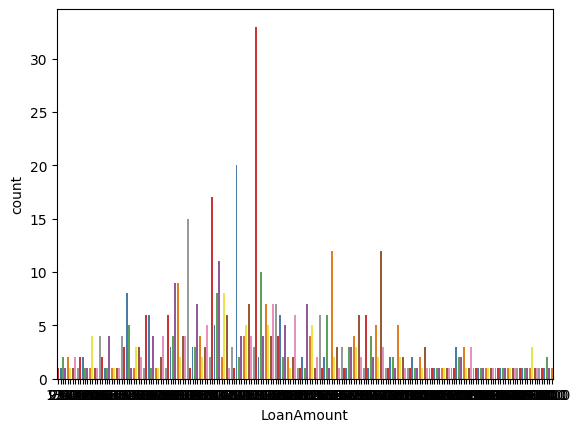

In [22]:
print("Number of people who take loans as grouped by LoanAmount: ")
print(df['LoanAmount'].value_counts())
sns.countplot(x="LoanAmount", data=df, palette="Set1")

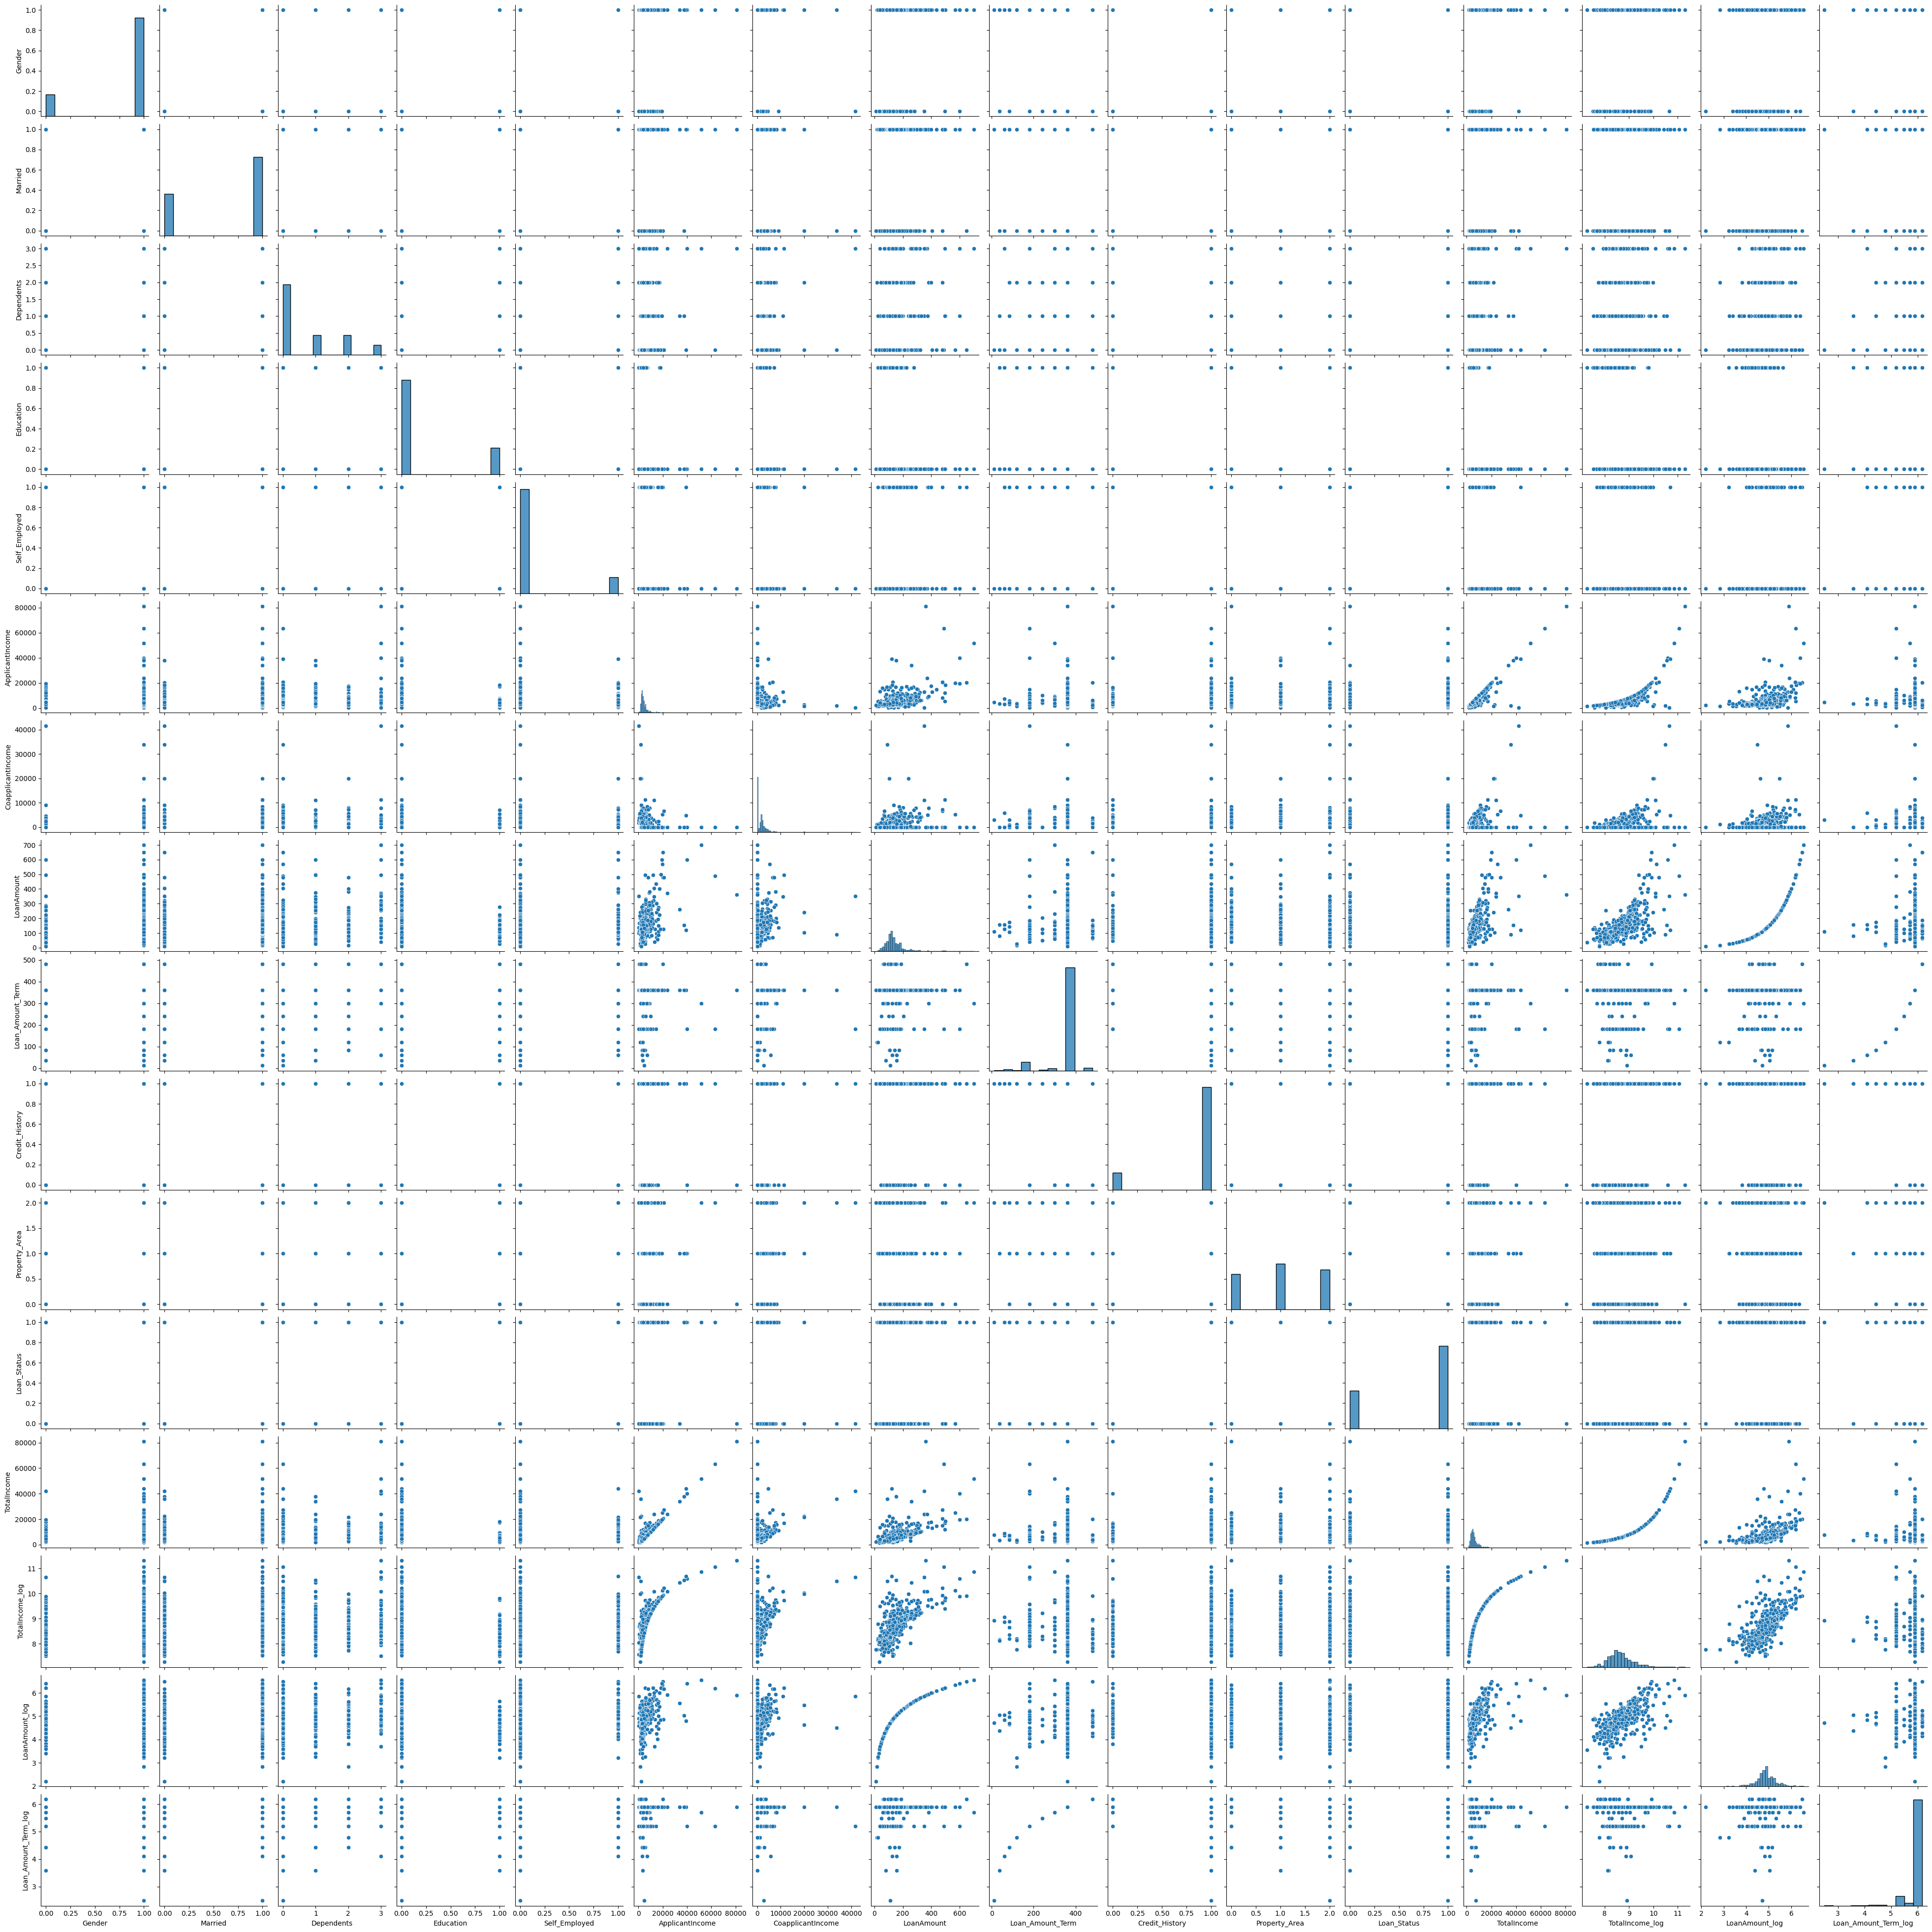

In [23]:
sns.pairplot(df)

<Axes: title={'center': 'LoanAmount'}, xlabel='Loan_Status'>

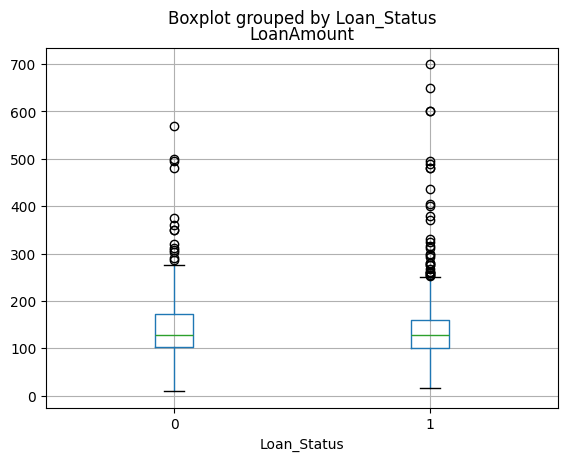

In [24]:
df.boxplot(column='LoanAmount',by= 'Loan_Status')

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

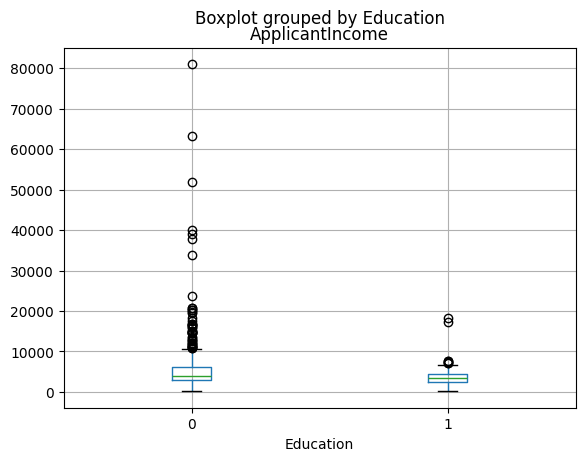

In [25]:
df.boxplot(column='ApplicantIncome',by= 'Education')

<Axes: >

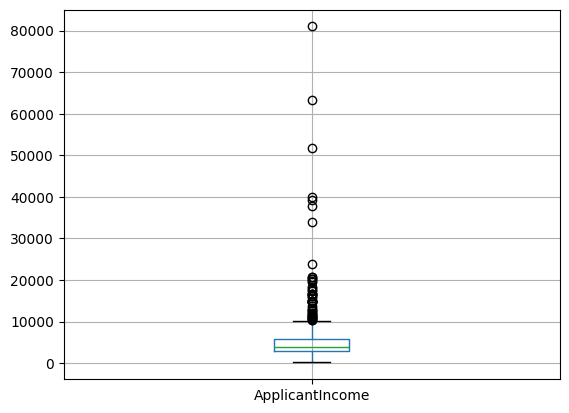

In [26]:
df.boxplot(column='ApplicantIncome')

In [5]:
# Encode categorical variables
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in categorical_columns:
    df[col] = pd.Categorical(df[col]).codes


In [6]:
# Prepare features and target
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [8]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Apply SMOTE for balancing classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


In [10]:
# Feature selection
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median')
X_train_selected = selector.fit_transform(X_train_resampled, y_train_resampled)
X_test_selected = selector.transform(X_test_scaled)

In [12]:
# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_selected, y_train_resampled)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [13]:
# Get best model
best_rf = grid_search.best_estimator_

In [14]:
# Make predictions
y_pred = best_rf.predict(X_test_selected)

In [15]:
# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8293
Precision: 0.9000
Recall: 0.8471
F1 Score: 0.8727


In [16]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns[selector.get_support()],
    'importance': best_rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Important Features:")
print(feature_importance.head(10))


Top 10 Important Features:
             feature  importance
3     Credit_History    0.209206
0    ApplicantIncome    0.138010
5        TotalIncome    0.132514
6    TotalIncome_log    0.119206
2         LoanAmount    0.119056
7     LoanAmount_log    0.116325
4      Property_Area    0.082924
1  CoapplicantIncome    0.082759


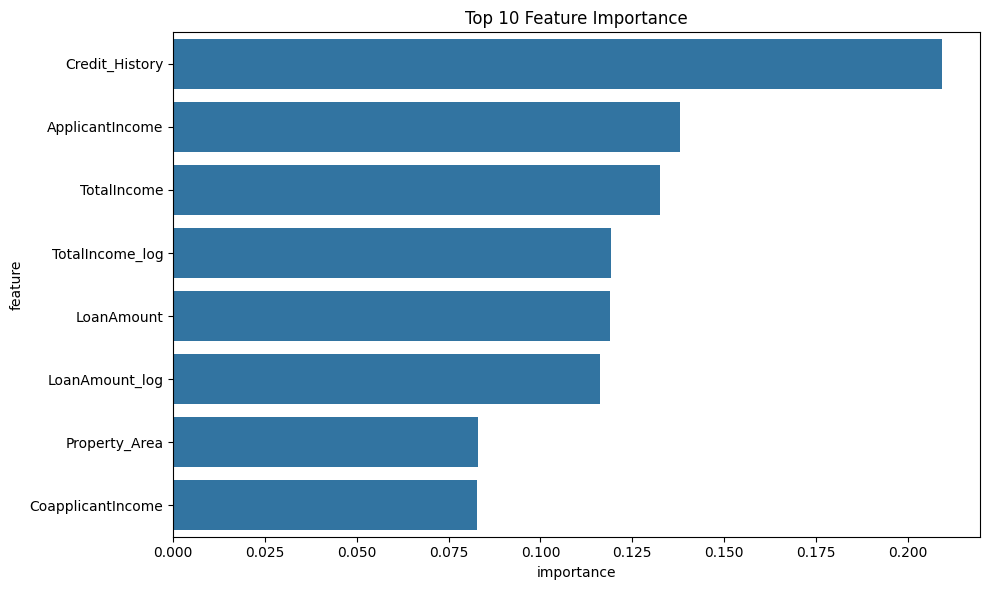

In [17]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importance')
plt.tight_layout()
plt.show()